In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import circuit_drawer

     
q_0: 
     
q_1: 
     
c: 2/
     


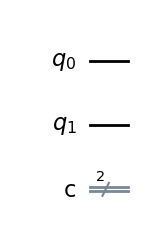

In [8]:
#Activity 1
basic_two_qubit_circuit = QuantumCircuit(2, 2)

print(basic_two_qubit_circuit.draw())
basic_two_qubit_circuit.draw("mpl")


                             
    quantum_register_main_0: 
                             
    quantum_register_main_1: 
                             
   quantum_register_ancilla: 
                             
classical_register_result: 1/
                             


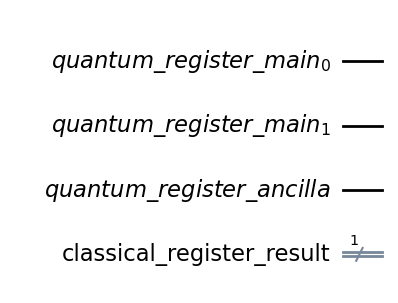

In [9]:
#Activity 2
quantum_register_main = QuantumRegister(2, "quantum_register_main")
quantum_register_ancilla = QuantumRegister(1, "quantum_register_ancilla")
classical_register_result  = ClassicalRegister(1, "classical_register_result")

combined_quantum_circuit = QuantumCircuit(quantum_register_main, quantum_register_ancilla, classical_register_result)

print(combined_quantum_circuit.draw())
combined_quantum_circuit.draw("mpl")

     ┌───┐┌─────────┐     ┌───┐
q_0: ┤ Z ├┤ Ry(π/2) ├──■──┤ H ├
     └───┘└─────────┘┌─┴─┐├───┤
q_1: ────────────────┤ X ├┤ Y ├
                     └───┘└───┘


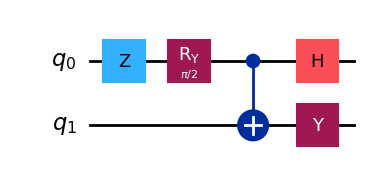

In [ ]:
# Activity 3
from qiskit import QuantumCircuit
import numpy

activity3_circuit = QuantumCircuit(2)
activity3_circuit.z(0)
activity3_circuit.ry(numpy.pi/2, 0)
# activity3_circuit.cx(0, 1)
activity3_circuit.h(0)
activity3_circuit.y(1)

print(activity3_circuit.draw())
activity3_circuit.draw("mpl")
